# Topic 11: Monetary policy and the Phillips curve

This lecture provides graphs that discuss the way how the central bank exploits the Phillips curve for the purposes of economic stabilization.

In [1]:
# load definitions
%matplotlib inline
from defs_intermediate_macro import *
%run defs_intermediate_macro

# Interest rates

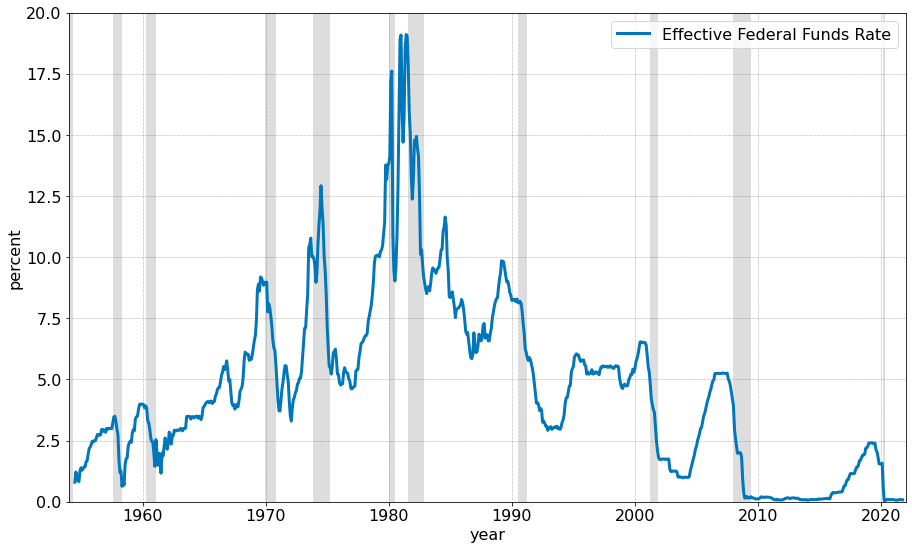

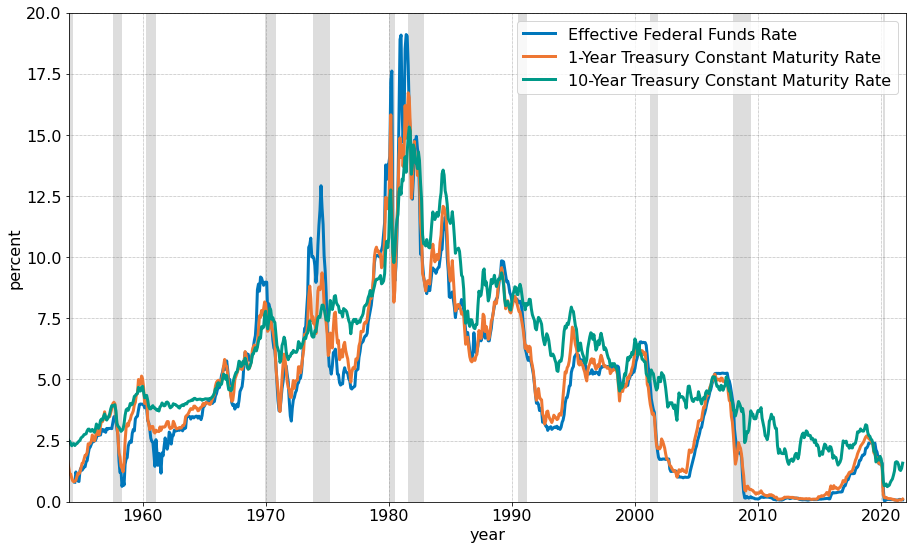

In [2]:
# interest rates data
data = myLoadDataFRED(series=['FEDFUNDS','GS1','GS10','AAA','BAA'],transform='none')

param = {'title': '',
         'xlim': [1954,2022], 'ylim': [0,20],
         'xlabel': 'year', 'ylabel': 'percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,25]}

# federal funds rate
fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['FEDFUNDS'],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Effective Federal Funds Rate')
ax.legend(loc='upper right')

# yields on treasury bonds
fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['FEDFUNDS'],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Effective Federal Funds Rate')
ax.plot(data['year'],data['GS1'],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantOrange'],label='1-Year Treasury Constant Maturity Rate')
ax.plot(data['year'],data['GS10'],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantTeal'],label='10-Year Treasury Constant Maturity Rate')
ax.legend(loc='upper right')

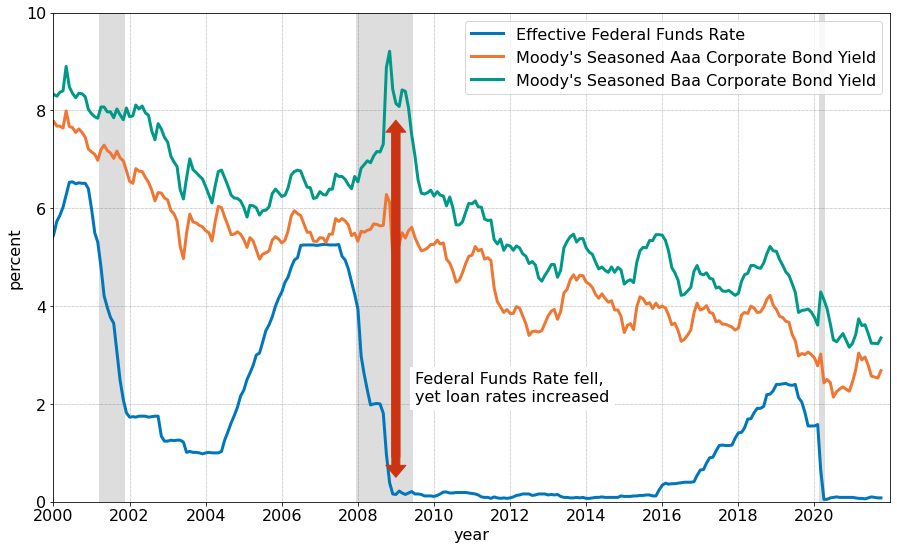

In [3]:
# yields on corporate debt

param = {'title': '',
         'xlim': [2000,2022], 'ylim': [0,10],
         'xlabel': 'year', 'ylabel': 'percent',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions': True, 'showNBERrecessions_y': [0,25]}

fig,ax = myGenerateTSPlot(param)

ax.plot(data['year'],data['FEDFUNDS'],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Effective Federal Funds Rate')
ax.plot(data['year'],data['AAA'],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantOrange'],label="Moody's Seasoned Aaa Corporate Bond Yield")
ax.plot(data['year'],data['BAA'],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantTeal'],label="Moody's Seasoned Baa Corporate Bond Yield")
ax.legend(loc='upper right')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=myColor['tolHighContrastWhite'], edgecolor=myColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(width=8,headwidth=20,edgecolor=myColor['tolVibrantRed'],facecolor=myColor['tolVibrantRed']))
#style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=myColor['tolHighContrastWhite'], edgecolor=myColor['tolHighContrastWhite'], linewidth=1),
#             arrowprops=dict(arrowstyle='<->',edgecolor=myColor['tolVibrantRed'],facecolor=myColor['tolVibrantRed'], shrink=0.05))

ax.annotate(text='',xy=(2009,0.5),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(2009,7.8), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',**style)
ax.annotate(text='',xy=(2009,7.8),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(2009,0.5), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='center', verticalalignment='bottom',**style)
ax.annotate(text='Federal Funds Rate fell,\nyet loan rates increased',
            xy=(2009.5,2),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='bottom',**style)
 
ax.set_xticks(np.linspace(2000,2020,11))

## Time-(in)consistency of monetary policy

In [4]:
# parameterization of the optimal policy graph

# optimal policy graph
from matplotlib.patches import Ellipse

Ytilde_o = 1
pibar = 2
ν = 0.5
κ = 2

# optimal outcome
pie_opt = pibar - ν*Ytilde_o

# Nash outcome
pi_N = pibar + 1/(κ*ν)*Ytilde_o
Ytilde_N = 0
U_N = -1/2*(Ytilde_N-Ytilde_o)**2 -κ/2*(pi_N-pibar)**2

U_vec = [-0.25,-0.75,U_N]

xmin,xmax = -1,2
ymin,ymax = 0,4

param = {'title': '',
         'xlim': [xmin,xmax], 'ylim': [ymin,ymax],
         'xlabel': '$\\widetilde{Y}_t$', 'ylabel': '$\\pi_t$',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': False, 'showNBERrecessions_y': [-12,6]}

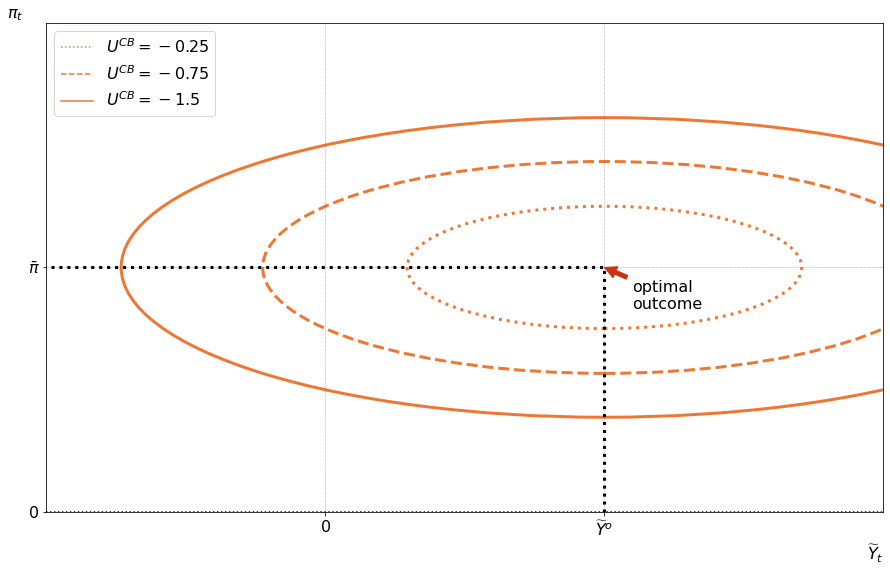

In [5]:
# indiffence curves
fig,ax = myGenerateTSPlot(param)

ax.set_xticks([0,Ytilde_o])
ax.set_xticklabels(['$0$','$\\widetilde{Y}^o$'])
ax.set_yticks([0,pibar])
ax.set_yticklabels(['0','$\\bar{\\pi}$'])
ax.plot([Ytilde_o,Ytilde_o,xmin],[ymin,pibar,pibar],':',linewidth=3,marker='',color=myColor['tolHighContrastBlack'])

ax.set_xlabel('$\\widetilde{Y}_t$',loc='right')
ax.set_ylabel('$\\pi_t$',loc='top',rotation=0)

# preferences
U = U_vec[0]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle=':',fill=False,edgecolor=myColor['tolVibrantOrange']))
U = U_vec[1]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle='--',fill=False,edgecolor=myColor['tolVibrantOrange']))
U = U_vec[2]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle='-',fill=False,edgecolor=myColor['tolVibrantOrange']))

ax.plot([xmin-1],[ymin],linestyle=':',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[0]}$')
ax.plot([xmin-1],[ymin],linestyle='--',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[1]}$')
ax.plot([xmin-1],[ymin],linestyle='-',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[2]}$')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=myColor['tolHighContrastWhite'], edgecolor=myColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=myColor['tolVibrantRed'],facecolor=myColor['tolVibrantRed']))

ax.annotate(text='optimal\noutcome',xy=(Ytilde_o,pibar),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(Ytilde_o+0.1,pibar-0.1), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='top',**style)

ax.legend(loc='upper left')

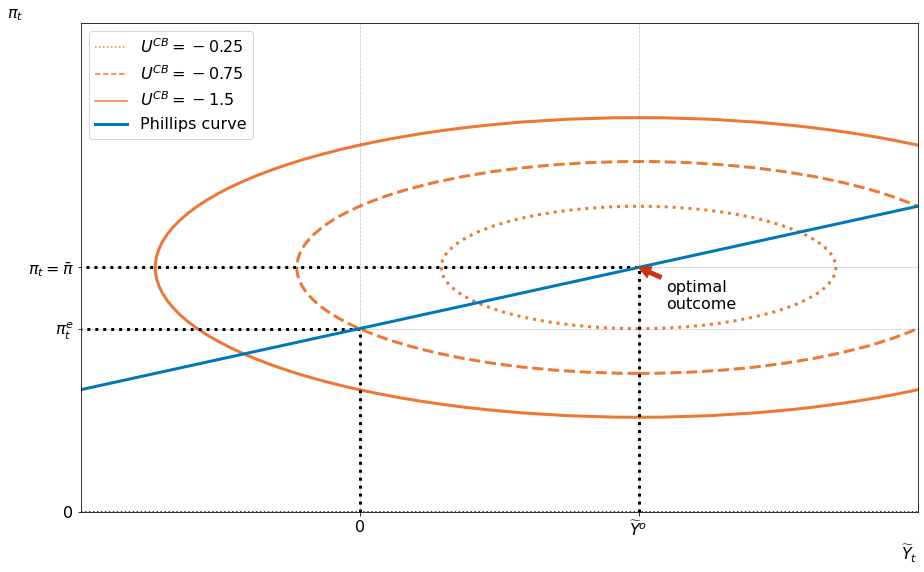

In [6]:
# Phillips curve inconsistent with Nash equilibrium
fig,ax = myGenerateTSPlot(param)

ax.set_xticks([0,Ytilde_o])
ax.set_xticklabels(['$0$','$\\widetilde{Y}^o$'])
ax.set_yticks([0,pie_opt,pibar])
ax.set_yticklabels(['0','$\\pi^{e}_t$','$\\pi_t = \\bar{\\pi}$'])
ax.plot([Ytilde_o,Ytilde_o,xmin],[ymin,pibar,pibar],':',linewidth=3,marker='',color=myColor['tolHighContrastBlack'])
ax.plot([0,0,xmin],[ymin,pie_opt,pie_opt],':',linewidth=3,marker='',color=myColor['tolHighContrastBlack'])

ax.set_xlabel('$\\widetilde{Y}_t$',loc='right')
ax.set_ylabel('$\\pi_t$',loc='top',rotation=0)

# preferences
U = U_vec[0]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle=':',fill=False,edgecolor=myColor['tolVibrantOrange']))
U = U_vec[1]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle='--',fill=False,edgecolor=myColor['tolVibrantOrange']))
U = U_vec[2]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle='-',fill=False,edgecolor=myColor['tolVibrantOrange']))

ax.plot([xmin-1],[ymin],linestyle=':',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[0]}$')
ax.plot([xmin-1],[ymin],linestyle='--',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[1]}$')
ax.plot([xmin-1],[ymin],linestyle='-',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[2]}$')

ax.plot([xmin,xmax],[pie_opt+ν*xmin,pie_opt+ν*xmax],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Phillips curve')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=myColor['tolHighContrastWhite'], edgecolor=myColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=myColor['tolVibrantRed'],facecolor=myColor['tolVibrantRed']))

ax.annotate(text='optimal\noutcome',xy=(Ytilde_o,pibar),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(Ytilde_o+0.1,pibar-0.1), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='top',**style)

ax.legend(loc='upper left')

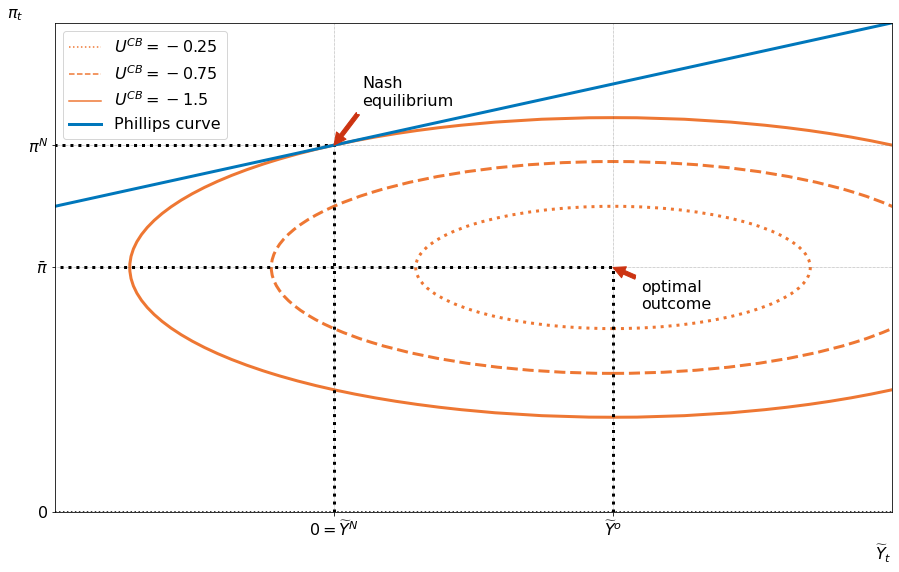

In [7]:
# Nash equilibrium
fig,ax = myGenerateTSPlot(param)

ax.set_xticks([0,Ytilde_o])
ax.set_xticklabels(['$0=\widetilde{Y}^N$','$\\widetilde{Y}^o$'])
ax.set_yticks([0,pibar,pi_N])
ax.set_yticklabels(['0','$\\bar{\\pi}$','$\\pi^N$'])
ax.plot([Ytilde_o,Ytilde_o,xmin],[ymin,pibar,pibar],':',linewidth=3,marker='',color=myColor['tolHighContrastBlack'])
ax.plot([Ytilde_N,Ytilde_N,xmin],[ymin,pi_N,pi_N],':',linewidth=3,marker='',color=myColor['tolHighContrastBlack'])

ax.set_xlabel('$\\widetilde{Y}_t$',loc='right')
ax.set_ylabel('$\\pi_t$',loc='top',rotation=0)

# preferences
U = U_vec[0]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle=':',fill=False,edgecolor=myColor['tolVibrantOrange']))
U = U_vec[1]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle='--',fill=False,edgecolor=myColor['tolVibrantOrange']))
U = U_vec[2]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle='-',fill=False,edgecolor=myColor['tolVibrantOrange']))

ax.plot([xmin-1],[ymin],linestyle=':',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[0]}$')
ax.plot([xmin-1],[ymin],linestyle='--',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[1]}$')
ax.plot([xmin-1],[ymin],linestyle='-',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[2]}$')

ax.plot([xmin,xmax],[pi_N+ν*xmin,pi_N+ν*xmax],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Phillips curve')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=myColor['tolHighContrastWhite'], edgecolor=myColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=myColor['tolVibrantRed'],facecolor=myColor['tolVibrantRed']))

ax.annotate(text='optimal\noutcome',xy=(Ytilde_o,pibar),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(Ytilde_o+0.1,pibar-0.1), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='top',**style)

ax.annotate(text='Nash\nequilibrium',xy=(Ytilde_N,pi_N),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(Ytilde_N+0.1,pi_N+0.3), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='bottom',**style)

ax.legend(loc='upper left')

## Nash equilibrium for alternative parameterizations

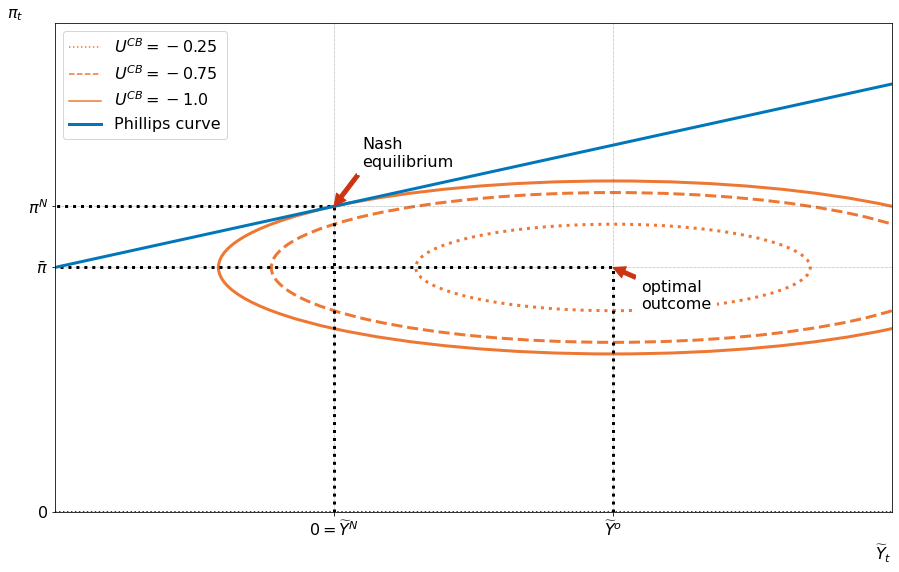

In [8]:
# parameterization with higher kappa
Ytilde_o = 1
pibar = 2
ν = 0.5
κ = 4

# optimal outcome
pie_opt = pibar - ν*Ytilde_o

# Nash outcome
pi_N = pibar + 1/(κ*ν)*Ytilde_o
Ytilde_N = 0
U_N = -1/2*(Ytilde_N-Ytilde_o)**2 -κ/2*(pi_N-pibar)**2

U_vec = [-0.25,-0.75,U_N]

xmin,xmax = -1,2
ymin,ymax = 0,4

param = {'title': '',
         'xlim': [xmin,xmax], 'ylim': [ymin,ymax],
         'xlabel': '$\\widetilde{Y}_t$', 'ylabel': '$\\pi_t$',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': False, 'showNBERrecessions_y': [-12,6]}

# Nash equilibrium
fig,ax = myGenerateTSPlot(param)

ax.set_xticks([0,Ytilde_o])
ax.set_xticklabels(['$0=\widetilde{Y}^N$','$\\widetilde{Y}^o$'])
ax.set_yticks([0,pibar,pi_N])
ax.set_yticklabels(['0','$\\bar{\\pi}$','$\\pi^N$'])
ax.plot([Ytilde_o,Ytilde_o,xmin],[ymin,pibar,pibar],':',linewidth=3,marker='',color=myColor['tolHighContrastBlack'])
ax.plot([Ytilde_N,Ytilde_N,xmin],[ymin,pi_N,pi_N],':',linewidth=3,marker='',color=myColor['tolHighContrastBlack'])

ax.set_xlabel('$\\widetilde{Y}_t$',loc='right')
ax.set_ylabel('$\\pi_t$',loc='top',rotation=0)

# preferences
U = U_vec[0]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle=':',fill=False,edgecolor=myColor['tolVibrantOrange']))
U = U_vec[1]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle='--',fill=False,edgecolor=myColor['tolVibrantOrange']))
U = U_vec[2]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle='-',fill=False,edgecolor=myColor['tolVibrantOrange']))

ax.plot([xmin-1],[ymin],linestyle=':',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[0]}$')
ax.plot([xmin-1],[ymin],linestyle='--',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[1]}$')
ax.plot([xmin-1],[ymin],linestyle='-',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[2]}$')

ax.plot([xmin,xmax],[pi_N+ν*xmin,pi_N+ν*xmax],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Phillips curve')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=myColor['tolHighContrastWhite'], edgecolor=myColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=myColor['tolVibrantRed'],facecolor=myColor['tolVibrantRed']))

ax.annotate(text='optimal\noutcome',xy=(Ytilde_o,pibar),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(Ytilde_o+0.1,pibar-0.1), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='top',**style)

ax.annotate(text='Nash\nequilibrium',xy=(Ytilde_N,pi_N),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(Ytilde_N+0.1,pi_N+0.3), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='bottom',**style)

ax.legend(loc='upper left')

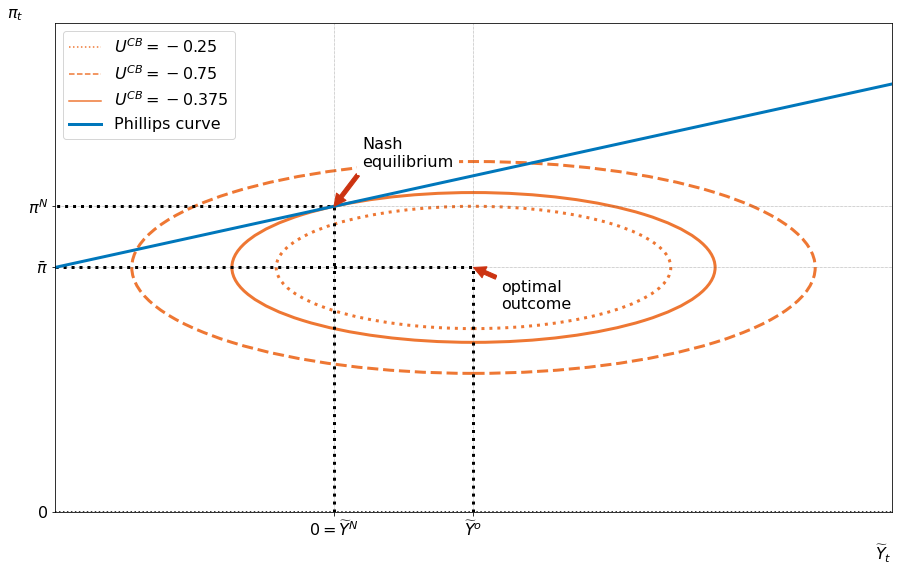

In [9]:
# parameterization with lower Ytilde_o
Ytilde_o = 0.5
pibar = 2
ν = 0.5
κ = 2

# optimal outcome
pie_opt = pibar - ν*Ytilde_o

# Nash outcome
pi_N = pibar + 1/(κ*ν)*Ytilde_o
Ytilde_N = 0
U_N = -1/2*(Ytilde_N-Ytilde_o)**2 -κ/2*(pi_N-pibar)**2

U_vec = [-0.25,-0.75,U_N]

xmin,xmax = -1,2
ymin,ymax = 0,4

param = {'title': '',
         'xlim': [xmin,xmax], 'ylim': [ymin,ymax],
         'xlabel': '$\\widetilde{Y}_t$', 'ylabel': '$\\pi_t$',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions': False, 'showNBERrecessions_y': [-12,6]}

# Nash equilibrium
fig,ax = myGenerateTSPlot(param)

ax.set_xticks([0,Ytilde_o])
ax.set_xticklabels(['$0=\widetilde{Y}^N$','$\\widetilde{Y}^o$'])
ax.set_yticks([0,pibar,pi_N])
ax.set_yticklabels(['0','$\\bar{\\pi}$','$\\pi^N$'])
ax.plot([Ytilde_o,Ytilde_o,xmin],[ymin,pibar,pibar],':',linewidth=3,marker='',color=myColor['tolHighContrastBlack'])
ax.plot([Ytilde_N,Ytilde_N,xmin],[ymin,pi_N,pi_N],':',linewidth=3,marker='',color=myColor['tolHighContrastBlack'])

ax.set_xlabel('$\\widetilde{Y}_t$',loc='right')
ax.set_ylabel('$\\pi_t$',loc='top',rotation=0)

# preferences
U = U_vec[0]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle=':',fill=False,edgecolor=myColor['tolVibrantOrange']))
U = U_vec[1]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle='--',fill=False,edgecolor=myColor['tolVibrantOrange']))
U = U_vec[2]
ax.add_artist(Ellipse(xy=(Ytilde_o,pibar),width=(-2*U)**0.5*2,height=(-2/κ*U)**0.5*2,linewidth=3,linestyle='-',fill=False,edgecolor=myColor['tolVibrantOrange']))

ax.plot([xmin-1],[ymin],linestyle=':',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[0]}$')
ax.plot([xmin-1],[ymin],linestyle='--',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[1]}$')
ax.plot([xmin-1],[ymin],linestyle='-',color=myColor['tolVibrantOrange'],label='$U^{CB}$'+f'$={U_vec[2]}$')

ax.plot([xmin,xmax],[pi_N+ν*xmin,pi_N+ν*xmax],
                    '-',linewidth=3,marker='',color=myColor['tolVibrantBlue'],label='Phillips curve')

style = dict(bbox=dict(boxstyle="square,pad=0.3", facecolor=myColor['tolHighContrastWhite'], edgecolor=myColor['tolHighContrastWhite'], linewidth=1),
             arrowprops=dict(edgecolor=myColor['tolVibrantRed'],facecolor=myColor['tolVibrantRed']))

ax.annotate(text='optimal\noutcome',xy=(Ytilde_o,pibar),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(Ytilde_o+0.1,pibar-0.1), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='top',**style)

ax.annotate(text='Nash\nequilibrium',xy=(Ytilde_N,pi_N),xycoords='data', # arrow tip, alternative xycoords is 'axes fraction'
            xytext=(Ytilde_N+0.1,pi_N+0.3), textcoords='data',# box position, alternative textcoords is 'axes fraction'
            horizontalalignment='left', verticalalignment='bottom',**style)

ax.legend(loc='upper left')